In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json
import csv
import itertools as itr
import datetime
import ast
from matplotlib import rcParams
from sklearn import cluster 
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import scale
from sklearn import model_selection
from sklearn.naive_bayes import GaussianNB

steam_app_data = pd.read_csv ('steam_app_data.csv')
steamspy_data = pd.read_csv ('steamspy_data.csv')

/var/folders/6b/9j1n7nx92nx0g666dtt85w780000gn/T/ipykernel_29101/2903645846.py:18: DtypeWarning: Columns (3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  steam_app_data = pd.read_csv ('steam_app_data.csv')


In [2]:
steamspy_data.rename(columns = {'appid':'steam_appid'}, inplace = True)
data = pd.merge(steam_app_data, steamspy_data, on='steam_appid',  how='outer')
del data['genre']
del data['name_y']
del data['developer']
del data['publisher']
del data['price_overview']
del data['languages']
data[:5]

,type,name_x,steam_appid,required_age,is_free,controller_support,dlc,detailed_description,about_the_game,short_description,...,owners,average_forever,average_2weeks,median_forever,median_2weeks,price,initialprice,discount,ccu,tags
0,game,3D Ultra™ Minigolf Adventures,10140,0.0,False,NaN,NaN,Whether you're a seasoned player or just a beg...,Whether you're a seasoned player or just a beg...,Whether you're a seasoned player or just a beg...,...,"0 .. 20,000",0.0,0.0,0.0,0.0,999.0,999.0,0.0,0.0,"{'Sports': 55, 'Mini Golf': 37, 'Golf': 35, 'L..."
1,game,A Stroke of Fate: Operation Valkyrie,10240,0.0,False,NaN,NaN,<p>Operation Valkyrie is a famous plan of the ...,<p>Operation Valkyrie is a famous plan of the ...,Operation Valkyrie is a famous plan of the Ger...,...,"0 .. 20,000",0.0,0.0,0.0,0.0,699.0,699.0,0.0,0.0,"{'Adventure': 27, 'Point & Click': 12, 'World ..."
2,game,Dracula: Origin,11050,0.0,False,NaN,NaN,Dracula: Origin reveals the dark origins of th...,Dracula: Origin reveals the dark origins of th...,Dracula: Origin reveals the dark origins of th...,...,"50,000 .. 100,000",234.0,0.0,234.0,0.0,999.0,999.0,0.0,1.0,"{'Adventure': 73, 'Casual': 52, 'Vampire': 48,..."
3,game,Gumboy Tournament,11230,0.0,False,NaN,NaN,"Test your reflexes, judgment and tactics while...","Test your reflexes, judgment and tactics while...","Test your reflexes, judgment and tactics while...",...,"50,000 .. 100,000",15.0,0.0,15.0,0.0,299.0,299.0,0.0,0.0,"{'Indie': 43, 'Casual': 38, 'Racing': 33, 'Mul..."
4,game,SlamIt Pinball Big Score,12430,0.0,False,NaN,NaN,Big Score is based around a classic story of p...,Big Score is based around a classic story of p...,Big Score is based around a classic story of p...,...,"0 .. 20,000",0.0,0.0,0.0,0.0,499.0,499.0,0.0,0.0,"{'Casual': 21, 'Pinball': 21}"


In [3]:
data_new = data[data['name_x'] == 'PAYDAY 2']
print(data_new)

       type    name_x  steam_appid required_age is_free controller_support  \
32492  game  PAYDAY 2       218620         18.0   False               full   

                                                     dlc  \
32492  [1824880, 1778790, 1778791, 1746580, 1654480, ...   

                                    detailed_description  \
32492  PAYDAY 2 is an action-packed, four-player co-o...   

                                          about_the_game  \
32492  PAYDAY 2 is an action-packed, four-player co-o...   

                                       short_description  ...  \
32492  PAYDAY 2 is an action-packed, four-player co-o...  ...   

                         owners average_forever average_2weeks median_forever  \
32492  20,000,000 .. 50,000,000          5970.0         2141.0          606.0   

      median_2weeks  price initialprice discount      ccu  \
32492         642.0  999.0        999.0      0.0  42949.0   

                                                    tags  
3249

In [4]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66902 entries, 0 to 66901
Data columns (total 52 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   type                     66655 non-null  object 
 1   name_x                   66803 non-null  object 
 2   steam_appid              66902 non-null  int64  
 3   required_age             66655 non-null  object 
 4   is_free                  66655 non-null  object 
 5   controller_support       14422 non-null  object 
 6   dlc                      9342 non-null   object 
 7   detailed_description     66587 non-null  object 
 8   about_the_game           66585 non-null  object 
 9   short_description        66593 non-null  object 
 10  fullgame                 0 non-null      float64
 11  supported_languages      66599 non-null  object 
 12  header_image             66655 non-null  object 
 13  website                  36119 non-null  object 
 14  pc_requirements       

In [5]:
print(data.shape,'\n', data.columns)

(66902, 52) 
 Index(['type', 'name_x', 'steam_appid', 'required_age', 'is_free',
       'controller_support', 'dlc', 'detailed_description', 'about_the_game',
       'short_description', 'fullgame', 'supported_languages', 'header_image',
       'website', 'pc_requirements', 'mac_requirements', 'linux_requirements',
       'legal_notice', 'drm_notice', 'ext_user_account_notice', 'developers',
       'publishers', 'demos', 'packages', 'package_groups', 'platforms',
       'metacritic', 'reviews', 'categories', 'genres', 'screenshots',
       'movies', 'recommendations', 'achievements', 'release_date',
       'support_info', 'background', 'content_descriptors', 'score_rank',
       'positive', 'negative', 'userscore', 'owners', 'average_forever',
       'average_2weeks', 'median_forever', 'median_2weeks', 'price',
       'initialprice', 'discount', 'ccu', 'tags'],
      dtype='object')


In [6]:
# Game Owners

data_owners = data.dropna(subset=['owners'])
owners_list = [ ]
for line in data_owners['owners']:
    num_1 = int(line[ :line.find (' ..')].replace(',', '').replace(' ..', ''))
    num_2 = int(line[line.find ('.. '): ].replace(',', '').replace('.. ', ''))
    mean_num = (num_1 + num_2) / 2 
    owners_list.append(mean_num)
sorted(owners_list, reverse=True)[:6]

[150000000.0, 75000000.0, 75000000.0, 75000000.0, 75000000.0, 35000000.0]

In [7]:
# Tags

data_tags = data.dropna(subset=['tags'])
tags_list = [ ]
for line in data_tags['tags']:
        tags = ast.literal_eval(line)
        if type(tags) == dict:
            tags_list.append(list(tags.keys()))
        else:
            tags_list.append(tags)
all_tags = set(itr.chain(*tags_list))
print(len(all_tags))
print(pd.Series(tags_list).value_counts().head())

428
[]                                    15522
[Indie, Casual]                         296
[Action, Indie]                         276
[Adventure, Casual, Hidden Object]      254
[Action, Indie, Casual]                 226
dtype: int64


In [8]:
# Concurrent Users

data_ccu = data.dropna(subset=['ccu'])
sorted(data_ccu['ccu'], reverse=True)[:15]

[821347.0,
 615508.0,
 517487.0,
 382831.0,
 195941.0,
 165529.0,
 115688.0,
 107834.0,
 92565.0,
 90703.0,
 71402.0,
 62871.0,
 61131.0,
 57984.0,
 57260.0]

In [9]:
# Discount (%)

data_discount = data.dropna(subset=['discount'])
(data_discount['discount']/100).value_counts()

0.00    53766
0.75      395
0.50      372
0.90      360
0.51      304
        ...  
0.47        1
0.63        1
0.36        1
0.38        1
0.29        1
Name: discount, Length: 68, dtype: int64

In [10]:
# Median_forever (median playtime since March 2009, in minutes)

data_median_forever = data.dropna(subset=['median_forever'])
sorted(data_median_forever['median_forever'], reverse=True)[:15]

[196245.0,
 87348.0,
 66448.0,
 47843.0,
 42389.0,
 40679.0,
 39770.0,
 39273.0,
 34559.0,
 27656.0,
 23311.0,
 21804.0,
 21724.0,
 20241.0,
 19438.0]

In [11]:
# Median_2weeks (median playtime in the last two weeks, in minutes)

data_median_2weeks = data.dropna(subset=['median_2weeks'])
sorted(data_median_2weeks['median_2weeks'], reverse=True)[:15]

[19864.0,
 19684.0,
 12041.0,
 9328.0,
 8387.0,
 6597.0,
 5636.0,
 4835.0,
 4376.0,
 4262.0,
 4195.0,
 3585.0,
 3346.0,
 3094.0,
 3035.0]

In [12]:
# Average_2weeks (average playtime in the last two weeks, in minutes)

data_average_2weeks = data.dropna(subset=['average_2weeks'])
sorted(data_average_2weeks['average_2weeks'], reverse=True)[:15]

[19864.0,
 19684.0,
 12041.0,
 8486.0,
 7024.0,
 6594.0,
 4262.0,
 4195.0,
 3447.0,
 3226.0,
 3216.0,
 3094.0,
 3080.0,
 3004.0,
 2837.0]

In [13]:
# Average_forever (average playtime since March 2009, in minutes)

data_average_forever = data.dropna(subset=['average_forever'])
sorted(data_average_forever['average_forever'], reverse=True)[:15]

[100648.0,
 66448.0,
 51185.0,
 47843.0,
 43686.0,
 42389.0,
 40679.0,
 37809.0,
 33165.0,
 29943.0,
 28266.0,
 27329.0,
 24385.0,
 23860.0,
 23311.0]

In [14]:
# Initial Price (1 EUR = 0.88 GBP (14.11.2022))

data_initialprice = data.dropna(subset=['initialprice'])
sorted(data_initialprice['initialprice'] / 100 * 0.88 , reverse=True)[:15]

[879.12,
 175.99120000000002,
 175.99120000000002,
 175.99120000000002,
 175.99120000000002,
 175.99120000000002,
 175.99120000000002,
 175.99120000000002,
 175.99120000000002,
 175.99120000000002,
 175.99120000000002,
 175.99120000000002,
 175.99120000000002,
 175.99120000000002,
 175.99120000000002]

In [15]:
# Metacritic Scores (out of 100)

data_metacritic = data.dropna(subset=['metacritic'])
data_metacritic['metacritic']
metacritic_list = [ ]
for line in data_metacritic['metacritic']:
    if type(line) == float:
        metacritic_list.append(line)
    else:
        metacritic = json.loads(line.replace("'",'"'))
        metacritic_list.append(metacritic.get('score'))
sorted(metacritic_list, reverse=True)[:15]

[97, 96, 96, 96, 96, 95, 94, 94, 94, 94, 94, 94, 94, 94, 93]

In [16]:
# Genres

data_genres = data.dropna(subset=['genres'])
genres_list = [ ]
for line in data_genres['genres']:
    genres = json.loads(line.replace("'",'"'))
    genres = [item.get('description') for item in genres]
    genres_list.append(genres)
all_genres = set(itr.chain(*genres_list))
print(all_genres)
ids_g_list = [ ]
for line in data_genres['genres']:
    ids = json.loads(line.replace("'",'"'))
    ids = [item.get('id') for item in ids]
    ids_g_list.append(ids)
all_ids_g = set(itr.chain(*ids_g_list))
print(all_ids_g)

{'Nudity', 'Sports', 'Casual', 'Accounting', 'RPG', 'Web Publishing', 'Tutorial', 'Software Training', 'Game Development', 'Sexual Content', 'Short', 'Massively Multiplayer', 'Documentary', 'Simulation', 'Utilities', 'Audio Production', 'Strategy', 'Animation & Modeling', 'Free to Play', 'Early Access', 'Video Production', 'Action', 'Violent', 'Episodic', '360 Video', 'Education', 'Gore', 'Indie', 'Racing', 'Photo Editing', 'Movie', 'Adventure', 'Design & Illustration'}
{'82', '70', '51', '71', '50', '60', '81', '84', '59', '55', '28', '54', '52', '2', '58', '4', '25', '74', '23', '85', '53', '83', '73', '3', '37', '9', '80', '57', '1', '18', '56', '72', '29'}


In [17]:
# Release Date

data_release_date = data.dropna(subset=['release_date'])
release_date_list = [ ]
coming_soon_list = [ ]
for line in data_release_date['release_date']:
    try:
        release_date = json.loads(line.replace("'",'"').replace('False','false').replace('True','true'))                    
        release_date_list.append(release_date.get('date')) 
        coming_soon_list.append(release_date.get('coming_soon'))
    except:
        pass
print(release_date_list[:5])  
print(coming_soon_list[:5]) 

['23 Jul, 2009', '28 Oct, 2011', '7 Aug, 2008', '19 May, 2008', '23 Feb, 2009']
[False, False, False, False, False]


In [18]:
# Release Year 

year_list = [ ] 
month_list = [ ]
day_list = [ ]
for line in release_date_list:
    try:
        data_form = datetime.datetime.strptime(line, '%d %b, %Y')
    except:
        try:
            data_form = datetime.datetime.strptime(line, '%Y')
        except:
             data_form = datetime.datetime(1, 1, 1)
    year_list.append(data_form.year)
    month_list.append(data_form.month)
    day_list.append(data_form.day)
pd.Series(year_list).value_counts()

2021    12371
2020     9889
2018     8224
2019     7980
1        6991
2017     6362
2016     4415
2022     3639
2015     2685
2014     1632
2013      483
2012      348
2009      328
2010      286
2011      275
2023      167
2008      162
2007      106
2006       64
2024       31
2025        7
2004        6
2005        6
2030        5
2001        4
2003        3
1999        3
1997        2
2000        2
2077        2
2002        1
1998        1
2040        1
3021        1
1895        1
2026        1
2028        1
2069        1
2033        1
dtype: int64

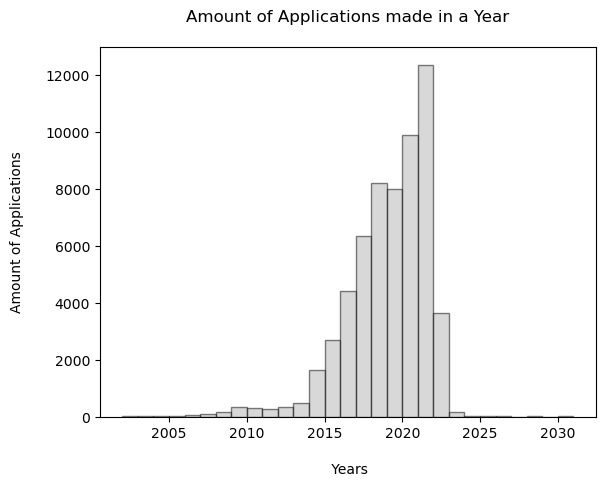

In [19]:
plt.hist(year_list, range(2002,2032), rwidth=100, alpha=0.5, color='0.7', histtype='bar', edgecolor='black')
plt.title('Amount of Applications made in a Year\n')
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 12
plt.ylabel('Amount of Applications\n')
plt.xlabel('\n Years')
plt.show()

In [20]:
# Developers

data_developers = data.dropna(subset=['developers'])
data_developers['developers'].value_counts()

['Choice of Games']               144
['Laush Dmitriy Sergeevich']      113
['Creobit']                       102
['KOEI TECMO GAMES CO., LTD.']     93
['Sokpop Collective']              90
                                 ... 
['Reside']                          1
['Ankor Studio']                    1
['FLO-server']                      1
['Chicken Launcher']                1
['Callipygian Games, LLC']          1
Name: developers, Length: 41672, dtype: int64

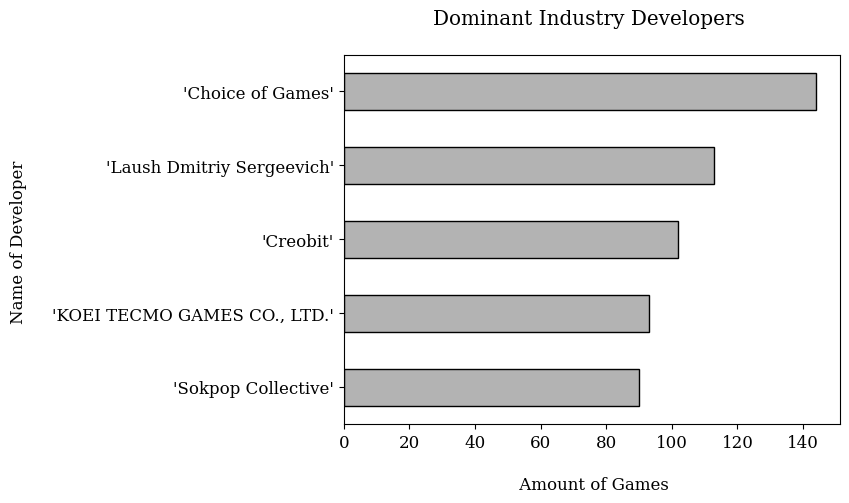

In [21]:
data_developers_name = data_developers['developers'].str[1:line.find (']')]
data_developers_name.value_counts().head().sort_values().plot.barh(color='0.7', edgecolor='black') 
plt.title('Dominant Industry Developers \n')
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 12
plt.ylabel('Name of Developer \n')
plt.xlabel('\n Amount of Games')
plt.show()

In [22]:
# Publishers

data_publishers = data.dropna(subset=['publishers'])
data_publishers['publishers'].value_counts()

['Big Fish Games']            416
['']                          377
['SEGA']                      168
['8floor']                    168
['Strategy First']            155
                             ... 
['Virtuous VR Gaming']          1
['BRINK XR Inc.']               1
['Fox_Sebby']                   1
['SketchyNonsense']             1
['Callipygian Games, LLC']      1
Name: publishers, Length: 36353, dtype: int64

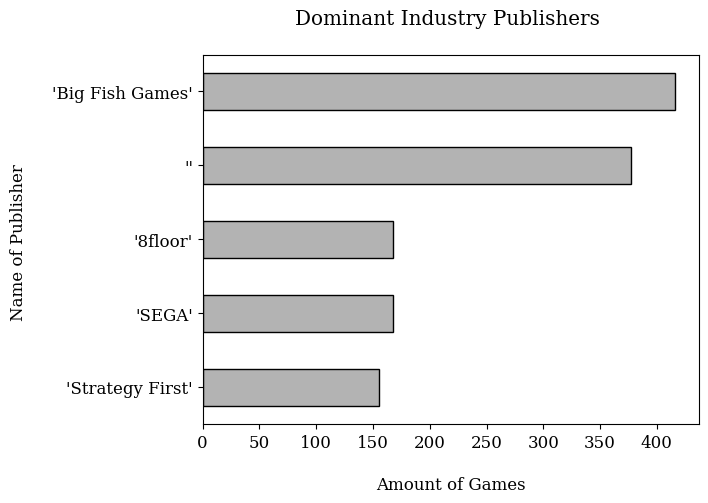

In [23]:
data_publishers_name = data_publishers['publishers'].str[1:line.find (']')]
data_publishers_name.value_counts().head().sort_values().plot.barh(color='0.7', edgecolor='black') 
plt.title('Dominant Industry Publishers \n')
plt.ylabel('Name of Publisher \n')
plt.xlabel('\nAmount of Games')
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 12
plt.show()

In [24]:
# Free Games

data_is_free = data.dropna(subset=['is_free'])
data_is_free['is_free'].value_counts()

False    59122
True      7533
Name: is_free, dtype: int64

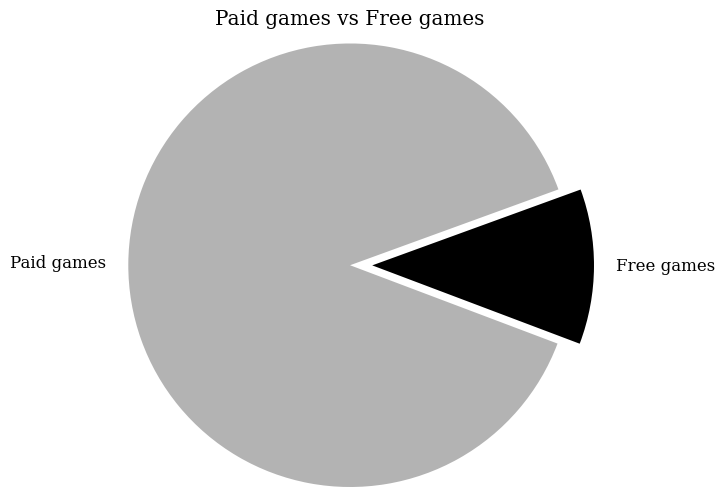

In [25]:
plt.title('Paid games vs Free games', pad = 40) 
plt.pie(data_is_free['is_free'].value_counts(), explode = (0, 0.15), labels = ('Paid games', 'Free games'), 
        colors = ('0.7', 'black'), startangle = 20, radius = 1.5)
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 12
plt.show()

In [26]:
# Type

data_type = data.dropna(subset=['type']) 
non_games = len(data['type']) - len(data_type)
print(non_games,'|', non_games / len(data['type']) * 100)
print('\n',data_type['type'].value_counts())

247 | 0.36919673552360166

 game           66653
advertising        1
hardware           1
Name: type, dtype: int64


In [27]:
# DLC

data_dlc = data['dlc'].notnull().sum() 
print(data_dlc, '|', data_dlc / len(data['dlc'] * 100)) 

9342 | 0.13963708110370393


In [28]:
# Demos

data_demos = data['demos'].notnull().sum()
print(data_demos, '|', data_demos / len(data['demos'] * 100))

6009 | 0.08981794266240173


In [29]:
# Categories

data_categories = data.dropna(subset=['categories'])
categories_list = [ ]
for line in data_categories['categories']:
    categories = json.loads(line.replace("'",'"'))
    categories = [item.get('description') for item in categories if item.get('description') not in 
                  ('Steam Achievements', 'Steam Leaderboards', 'Steam Cloud', 'Steam Trading Cards', 
                   'Steam Workshop', 'Steam Turn Notifications', 'SteamVR Collectibles', 'Captions available', 
                   'Commentary available',  'Includes Source SDK', 'Stats')]
    categories_list.append(categories) 
all_categories = set(itr.chain(*categories_list))
print(all_categories)
ids_c_list = [ ]
for line in data_categories['categories']:
    ids = json.loads(line.replace("'",'"'))
    ids = [item.get('id') for item in ids if item.get('description') not in 
           ('Steam Achievements', 'Steam Leaderboards', 'Steam Cloud', 'Steam Trading Cards', 'Steam Workshop', 
            'Steam Turn Notifications', 'SteamVR Collectibles', 'Captions available', 'Commentary available',  
            'Includes Source SDK', 'Stats')]
    ids_c_list.append(ids) 
all_ids_c = set(itr.chain(*ids_c_list))
print(all_ids_c)

{'Online Co-op', 'Remote Play Together', 'VR Support', 'Mods', 'Remote Play on Phone', 'Full controller support', 'Includes level editor', 'Shared/Split Screen PvP', 'Remote Play on Tablet', 'Remote Play on TV', 'Valve Anti-Cheat enabled', 'Single-player', 'LAN PvP', 'LAN Co-op', 'Multi-player', 'Partial Controller Support', 'Shared/Split Screen Co-op', 'Co-op', 'Mods (require HL2)', 'Online PvP', 'In-App Purchases', 'Shared/Split Screen', 'PvP', 'Cross-Platform Multiplayer', 'MMO'}
{1, 2, 6, 8, 9, 17, 18, 19, 20, 24, 27, 28, 31, 35, 36, 37, 38, 39, 41, 42, 43, 44, 47, 48, 49}


In [30]:
# Recommendations

data_recommendations= data.dropna(subset=['recommendations'])
data_recommendations['recommendations']
recommendations_list = []
for line in data_recommendations['recommendations']:
    number = int(line [line.find (' '):line.find ('}')])
    recommendations_list.append(number)
sorted(recommendations_list, reverse=True)[:15]

[3288906,
 1578948,
 1157735,
 863539,
 719783,
 671976,
 595884,
 556232,
 533952,
 434432,
 428094,
 418847,
 413046,
 408365,
 400038]

In [31]:
# Positive Rating

data_positive_score = data.dropna(subset=['positive'])
data_positive_score['positive']
sorted(data_positive_score['positive'], reverse=True)[:15]

[5472091.0,
 1398684.0,
 1089871.0,
 1086669.0,
 898059.0,
 893315.0,
 792539.0,
 767568.0,
 651289.0,
 591388.0,
 575830.0,
 561104.0,
 506503.0,
 502530.0,
 470796.0]

In [32]:
# Negative Rating

data_negative_score = data.dropna(subset=['negative'])
data_negative_score['negative']
sorted(data_negative_score['negative'], reverse=True)[:15]

[868546.0,
 733433.0,
 273412.0,
 203526.0,
 131421.0,
 118853.0,
 105264.0,
 96732.0,
 93082.0,
 92996.0,
 90936.0,
 88536.0,
 76063.0,
 68824.0,
 68540.0]

In [33]:
# User Score (out of 100)

data_userscore = data.dropna(subset=['userscore'])
data_userscore['userscore'].value_counts()

0.0      63920
100.0        5
95.0         3
46.0         2
51.0         2
82.0         2
80.0         2
84.0         2
77.0         2
68.0         2
62.0         1
94.0         1
88.0         1
59.0         1
83.0         1
70.0         1
97.0         1
96.0         1
71.0         1
66.0         1
57.0         1
53.0         1
61.0         1
76.0         1
69.0         1
78.0         1
92.0         1
65.0         1
63.0         1
73.0         1
98.0         1
74.0         1
67.0         1
81.0         1
60.0         1
87.0         1
Name: userscore, dtype: int64

In [34]:
# Price (1 EUR = 0.88 GBP (14.11.2022))

data_price = data.dropna(subset=['price'])
prices_GBP = data_price['price'] / 100 * 0.88
sorted(prices_GBP, reverse=True)[:15]

[879.12,
 175.99120000000002,
 175.99120000000002,
 175.99120000000002,
 175.99120000000002,
 175.99120000000002,
 175.99120000000002,
 175.99120000000002,
 175.99120000000002,
 175.99120000000002,
 175.99120000000002,
 175.99120000000002,
 175.99120000000002,
 175.99120000000002,
 175.99120000000002]

In [35]:
# Required Age

data_required_age = pd.to_numeric(data['required_age'], errors='coerce')
max(data_required_age.value_counts(normalize=False, sort=True, ascending=False, bins=None, dropna=True)) / len(data_required_age) * 100

98.0718065229739

In [36]:
# Platforms

data_platforms = data.dropna(subset=['platforms'])
data_platforms_list = [ ]
for line in data_platforms['platforms']:
    platforms = json.loads(line.replace("'",'"').replace('False','false').replace('True','true'))                    
    data_platforms_list.append(list(filter(lambda x: platforms[x], platforms.keys())))
pd.Series(data_platforms_list).value_counts()

[windows]                49872
[windows, mac, linux]     7910
[windows, mac]            6968
[windows, linux]          1883
[mac]                       15
[linux]                      6
[mac, linux]                 1
dtype: int64

In [37]:
# Languages

data_supported_languages = data.dropna(subset=['supported_languages']) 
data_supported_languages['supported_languages'].value_counts().head()

English                                                                             19098
English<strong>*</strong><br><strong>*</strong>languages with full audio support    17070
English, Russian                                                                     1598
English, Simplified Chinese                                                           786
Simplified Chinese                                                                    770
Name: supported_languages, dtype: int64

In [38]:
# Unsupervised Analysis

steamspy_data.rename(columns = {'appid':'steam_appid'}, inplace = True)
data = pd.merge(steam_app_data, steamspy_data, on='steam_appid',  how='outer')
del data['genre']
del data['name_y']
del data['developer']
del data['publisher']
del data['price_overview']
del data['languages']
    
ids_g_list_u = [ ]
for line in data['genres']:
    if type(line) == float:
        ids_g_list_u.append(line)
    else:
        ids = json.loads(line.replace("'",'"'))
        ids = [item.get('id') for item in ids]
        ids_g_list_u.append(ids)
data['genres'] = ids_g_list_u

ids_c_list_u = [ ]
for line in data['categories']:
    if type(line) == float:
        ids_c_list_u.append(line)
    else:
        ids = json.loads(line.replace("'",'"'))
        ids = [item.get('id') for item in ids]
        ids_c_list_u.append(ids)
data['categories'] = ids_c_list_u

data['price'] = data['price'] / 100 * 0.88

data['initialprice'] = data['initialprice']/ 100 * 0.88

data['discount'] = data['discount']/100

owners_list = [ ]
for line in data['owners']:
    if type(line) == float:                          
        owners_list.append(line)
    else:
        num_1 = int(line[ :line.find (' ..')].replace(',', '').replace(' ..', ''))
        num_2 = int(line[line.find ('.. '): ].replace(',', '').replace('.. ', ''))
        mean_num = (num_1 + num_2) / 2 
        owners_list.append(mean_num)
data['owners'] = owners_list

u_analysis_data = (data[['steam_appid','genres','categories','price','initialprice','discount','owners',
                         'median_forever','average_forever','median_2weeks','average_2weeks','ccu','positive',
                         'negative','userscore']])

u_analysis_data = u_analysis_data.explode('genres')
u_analysis_data = u_analysis_data.explode('categories')
u_analysis_data

,steam_appid,genres,categories,price,initialprice,discount,owners,median_forever,average_forever,median_2weeks,average_2weeks,ccu,positive,negative,userscore
0,10140,18,2,8.7912,8.7912,0.0,10000.0,0.0,0.0,0.0,0.0,0.0,67.0,39.0,0.0
1,10240,25,2,6.1512,6.1512,0.0,10000.0,0.0,0.0,0.0,0.0,0.0,17.0,12.0,0.0
2,11050,25,2,8.7912,8.7912,0.0,75000.0,234.0,234.0,0.0,0.0,1.0,142.0,73.0,0.0
2,11050,4,2,8.7912,8.7912,0.0,75000.0,234.0,234.0,0.0,0.0,1.0,142.0,73.0,0.0
3,11230,4,2,2.6312,2.6312,0.0,75000.0,15.0,15.0,0.0,0.0,0.0,333.0,140.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66897,1790310,NaN,NaN,NaN,NaN,NaN,10000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
66898,1796230,NaN,NaN,NaN,NaN,NaN,10000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
66899,1809230,NaN,NaN,NaN,NaN,NaN,10000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
66900,1842920,NaN,NaN,NaN,NaN,NaN,10000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
u_analysis_data_num = u_analysis_data.apply(pd.to_numeric, errors='coerce')
u_analysis_data_num = u_analysis_data_num.dropna()
u_analysis_data_num = u_analysis_data_num.reset_index(drop=True)

# The Min-Max Feature Scaling Data Normalization

# u_analysis_data_num ['owners']  = (u_analysis_data_num ['owners'] - u_analysis_data_num ['owners'].min()) / (u_analysis_data_num ['owners'].max() - u_analysis_data_num ['owners'].min())    
# u_analysis_data_num ['median_forever']  = (u_analysis_data_num ['median_forever'] - u_analysis_data_num ['median_forever'].min()) / (u_analysis_data_num ['median_forever'].max() - u_analysis_data_num ['median_forever'].min())    
# u_analysis_data_num ['average_forever']  = (u_analysis_data_num ['average_forever'] - u_analysis_data_num ['average_forever'].min()) / (u_analysis_data_num ['average_forever'].max() - u_analysis_data_num ['average_forever'].min())    
# u_analysis_data_num ['median_2weeks']  = (u_analysis_data_num ['median_2weeks'] - u_analysis_data_num ['median_2weeks'].min()) / (u_analysis_data_num ['median_2weeks'].max() - u_analysis_data_num ['median_2weeks'].min())    
# u_analysis_data_num ['average_2weeks']  = (u_analysis_data_num ['average_2weeks'] - u_analysis_data_num ['average_2weeks'].min()) / (u_analysis_data_num ['average_2weeks'].max() - u_analysis_data_num ['average_2weeks'].min())    
# u_analysis_data_num ['ccu']  = (u_analysis_data_num ['ccu'] - u_analysis_data_num ['ccu'].min()) / (u_analysis_data_num ['ccu'].max() - u_analysis_data_num ['ccu'].min())    
# u_analysis_data_num ['positive']  = (u_analysis_data_num ['positive'] - u_analysis_data_num ['positive'].min()) / (u_analysis_data_num ['positive'].max() - u_analysis_data_num ['positive'].min())    
# u_analysis_data_num ['negative']  = (u_analysis_data_num ['negative'] - u_analysis_data_num ['negative'].min()) / (u_analysis_data_num ['negative'].max() - u_analysis_data_num ['negative'].min())    

# The Maximum Absolute Scaling Data Normalization

# u_analysis_data_num ['owners'] = u_analysis_data_num ['owners'] / max(u_analysis_data_num ['owners'])
# u_analysis_data_num ['median_forever'] = u_analysis_data_num ['median_forever'] / max(u_analysis_data_num ['median_forever'])
# u_analysis_data_num ['average_forever'] = u_analysis_data_num ['average_forever'] / max(u_analysis_data_num ['average_forever'])
# u_analysis_data_num ['median_2weeks'] = u_analysis_data_num ['median_2weeks'] / max(u_analysis_data_num ['median_2weeks'])
# u_analysis_data_num ['average_2weeks'] = u_analysis_data_num ['average_2weeks'] / max(u_analysis_data_num ['average_2weeks'])
# u_analysis_data_num ['ccu'] = u_analysis_data_num ['ccu'] / max(u_analysis_data_num ['ccu'])
# u_analysis_data_num ['positive'] = u_analysis_data_num ['positive'] / max(u_analysis_data_num ['positive'])
# u_analysis_data_num ['negative'] = u_analysis_data_num ['negative'] / max(u_analysis_data_num ['negative'])

u_analysis_data_num

,steam_appid,genres,categories,price,initialprice,discount,owners,median_forever,average_forever,median_2weeks,average_2weeks,ccu,positive,negative,userscore
0,10140,18.0,2.0,8.7912,8.7912,0.0,10000.0,0.0,0.0,0.0,0.0,0.0,67.0,39.0,0.0
1,10240,25.0,2.0,6.1512,6.1512,0.0,10000.0,0.0,0.0,0.0,0.0,0.0,17.0,12.0,0.0
2,11050,25.0,2.0,8.7912,8.7912,0.0,75000.0,234.0,234.0,0.0,0.0,1.0,142.0,73.0,0.0
3,11050,4.0,2.0,8.7912,8.7912,0.0,75000.0,234.0,234.0,0.0,0.0,1.0,142.0,73.0,0.0
4,11230,4.0,2.0,2.6312,2.6312,0.0,75000.0,15.0,15.0,0.0,0.0,0.0,333.0,140.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578897,1891040,23.0,2.0,1.7512,1.7512,0.0,10000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
578898,1891040,23.0,22.0,1.7512,1.7512,0.0,10000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
578899,1891040,23.0,25.0,1.7512,1.7512,0.0,10000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
578900,1896610,25.0,2.0,11.0792,12.3112,0.1,10000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
u_analysis_data_num = u_analysis_data_num[u_analysis_data_num ['genres'] != 0]
u_analysis_data_num = u_analysis_data_num[u_analysis_data_num ['owners'] != 0]
u_analysis_data_num = u_analysis_data_num[u_analysis_data_num ['median_forever'] != 0]
u_analysis_data_num = u_analysis_data_num[u_analysis_data_num ['average_forever'] != 0]
u_analysis_data_num = u_analysis_data_num[u_analysis_data_num ['positive'] != 0]
u_analysis_data_num = u_analysis_data_num[u_analysis_data_num ['negative'] != 0]
u_analysis_data_num = u_analysis_data_num[u_analysis_data_num ['userscore'] != 0]
u_analysis_data_num

,steam_appid,genres,categories,price,initialprice,discount,owners,median_forever,average_forever,median_2weeks,average_2weeks,ccu,positive,negative,userscore
2705,560000,71.0,2.0,17.5912,17.5912,0.0,10000.0,32.0,32.0,0.0,0.0,0.0,170.0,8.0,95.0
2706,560000,71.0,22.0,17.5912,17.5912,0.0,10000.0,32.0,32.0,0.0,0.0,0.0,170.0,8.0,95.0
2707,560000,72.0,2.0,17.5912,17.5912,0.0,10000.0,32.0,32.0,0.0,0.0,0.0,170.0,8.0,95.0
2708,560000,72.0,22.0,17.5912,17.5912,0.0,10000.0,32.0,32.0,0.0,0.0,0.0,170.0,8.0,95.0
2709,560000,23.0,2.0,17.5912,17.5912,0.0,10000.0,32.0,32.0,0.0,0.0,0.0,170.0,8.0,95.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495448,723090,3.0,29.0,17.5912,17.5912,0.0,35000.0,315.0,231.0,0.0,0.0,26.0,446.0,10.0,97.0
495449,723090,3.0,23.0,17.5912,17.5912,0.0,35000.0,315.0,231.0,0.0,0.0,26.0,446.0,10.0,97.0
508434,928520,23.0,2.0,2.6312,2.6312,0.0,10000.0,92.0,86.0,0.0,0.0,0.0,66.0,10.0,87.0
508435,928520,3.0,2.0,2.6312,2.6312,0.0,10000.0,92.0,86.0,0.0,0.0,0.0,66.0,10.0,87.0


In [41]:
u_analysis_data_num.describe()

,steam_appid,genres,categories,price,initialprice,discount,owners,median_forever,average_forever,median_2weeks,average_2weeks,ccu,positive,negative,userscore
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.0,128.000000,128.000000,128.000000,128.0,128.0,128.000000,128.000000,128.000000,128.000000
mean,698482.578125,14.773438,18.757812,4.599444,4.599444,0.0,46406.250000,175.429688,173.000000,0.0,0.0,16.796875,429.007812,87.914062,78.421875
std,207550.779743,15.391078,14.147561,5.791080,5.791080,0.0,47929.317627,110.767308,116.796546,0.0,0.0,42.970299,394.348311,80.251968,16.334404
min,106000.000000,1.000000,1.000000,0.000000,0.000000,0.0,10000.000000,18.000000,18.000000,0.0,0.0,0.000000,28.000000,6.000000,46.000000
25%,639780.000000,2.000000,2.000000,1.751200,1.751200,0.0,10000.000000,109.000000,92.000000,0.0,0.0,1.000000,195.000000,18.000000,72.250000
50%,726360.000000,4.000000,22.000000,2.631200,2.631200,0.0,35000.000000,150.000000,143.000000,0.0,0.0,2.000000,362.000000,67.000000,77.000000
75%,823550.000000,23.000000,29.000000,4.391200,4.391200,0.0,75000.000000,230.000000,268.000000,0.0,0.0,3.000000,367.000000,103.000000,95.000000
max,958480.000000,72.000000,49.000000,17.591200,17.591200,0.0,150000.000000,449.000000,449.000000,0.0,0.0,149.000000,1449.000000,294.000000,98.000000


In [42]:
X = u_analysis_data_num.values[:,2:]
X

array([[  2.    ,  17.5912,  17.5912, ..., 170.    ,   8.    ,  95.    ],
       [ 22.    ,  17.5912,  17.5912, ..., 170.    ,   8.    ,  95.    ],
       [  2.    ,  17.5912,  17.5912, ..., 170.    ,   8.    ,  95.    ],
       ...,
       [  2.    ,   2.6312,   2.6312, ...,  66.    ,  10.    ,  87.    ],
       [  2.    ,   2.6312,   2.6312, ...,  66.    ,  10.    ,  87.    ],
       [  2.    ,   2.6312,   2.6312, ...,  66.    ,  10.    ,  87.    ]])

In [43]:
Y = u_analysis_data_num.values[:,1:2]
Y

array([[71.],
       [71.],
       [72.],
       [72.],
       [23.],
       [23.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [25.],
       [25.],
       [25.],
       [25.],
       [25.],
       [25.],
       [25.],
       [25.],
       [23.],
       [23.],
       [23.],
       [23.],
       [23.],
       [23.],
       [23.],
       [23.],
       [29.],
       [29.],
       [29.],
       [29.],
       [29.],
       [29.],
       [29.],
       [29.],
       [ 4.],
       [ 4.],
       [37.],
       [37.],
       [23.],
       [23.],
       [ 3.],
       [ 3.],
       [28.],
       [28.],
       [ 2.],
       [ 2.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 4.],
       [ 4.],
       [ 4.],
       [ 4.],
       [ 4.],
       [23.],
       [23.],
       [23.],
       [23.],
       [23.],
       [23.],
       [23.],
       [28.],
       [28.],
       [ 1.],
       [ 1.],
      

In [44]:
scaled_data = scale(X)
scaled_data

array([[-1.18915612,  2.25222303,  2.25222303, ..., -0.65938035,
        -0.99970219,  1.01890865],
       [ 0.23006983,  2.25222303,  2.25222303, ..., -0.65938035,
        -0.99970219,  1.01890865],
       [-1.18915612,  2.25222303,  2.25222303, ..., -0.65938035,
        -0.99970219,  1.01890865],
       ...,
       [-1.18915612, -0.34121052, -0.34121052, ..., -0.92414286,
        -0.97468275,  0.5272204 ],
       [-1.18915612, -0.34121052, -0.34121052, ..., -0.92414286,
        -0.97468275,  0.5272204 ],
       [-1.18915612, -0.34121052, -0.34121052, ..., -0.92414286,
        -0.97468275,  0.5272204 ]])

In [45]:
# K-Means Clustering

n_samples, n_features = scaled_data.shape
Y = np.squeeze(Y)
n_digits = len(np.unique(Y))
Y2 = LabelEncoder().fit_transform(Y) 
for k in range(2, 23):
    kmeans = cluster.KMeans(n_clusters=k) 
    kmeans.fit(scaled_data)
    print(k)
    print(metrics.silhouette_score(scaled_data, kmeans.labels_)) 
    print(metrics.completeness_score(Y2, kmeans.labels_)) 
    print(metrics.homogeneity_score(Y2, kmeans.labels_))

/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/clust

2
0.28290229713708404
0.26271046872369286
0.08680489985135413
3
0.377990334881256
0.32931413748712907
0.13843079867246774
4
0.43765044351082205
0.3912119474347795
0.24039690088331384
5
0.47600101939820627
0.3657254798410095
0.2748981100941257
6
0.49222955934778734
0.34704931639714304
0.29143523444562874
7
0.5400982835134619
0.391536145152921
0.34938377727058817
8
0.5484984190210306
0.4118807104889461
0.3952140503138886
9
0.5844088775816177
0.38919398939603667


/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/clust

0.39805297297229314
10
0.6196706624387003
0.360663872804685
0.3980529729722931
11
0.644889569763307
0.3505668433198376
0.39805297297229314
12
0.6401521260574337
0.36259733986989373
0.42168109828409595
13
0.6663160506991793
0.3559079687831776
0.42168109828409595
14
0.6788966515122887
0.350503407589912
0.4216810982840959
15
0.6737151217888873
0.34461236180412036
0.43167953288139377
16
0.7021494014220903
0.3565967665311691
0.45287142612353737
17
0.6952871735581924
0.3674376729715667
0.4831886636625793


/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


18
0.7079454692801173
0.35190491825826575
0.47859177779988626
19
0.7251761198913592
0.3463297902016223
0.47859177779988626
20
0.7254858137305262
0.34677602256345286
0.4862224077560125
21
0.7469459725355524
0.33984884735935145
0.48318866366257923


/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


22
0.7727234772122895
0.33623144474715766
0.48318866366257923


In [46]:
"""# Agglomerative Hierarchical Clustering

n_samples, n_features = scaled_data.shape
Y = np.squeeze(Y)
n_digits = len(np.unique(Y))
Y2 = LabelEncoder().fit_transform(Y)
model = cluster.AgglomerativeClustering(n_clusters=n_digits, linkage="average", affinity="cosine")
model.fit(scaled_data)
print(Y2)
print(model.labels_) 
print(metrics.silhouette_score(scaled_data, model.labels_)) 
print(metrics.completeness_score(Y2, model.labels_)) 
print(metrics.homogeneity_score(Y2, model.labels_))"""

'# Agglomerative Hierarchical Clustering\n\nn_samples, n_features = scaled_data.shape\nY = np.squeeze(Y)\nn_digits = len(np.unique(Y))\nY2 = LabelEncoder().fit_transform(Y)\nmodel = cluster.AgglomerativeClustering(n_clusters=n_digits, linkage="average", affinity="cosine")\nmodel.fit(scaled_data)\nprint(Y2)\nprint(model.labels_) \nprint(metrics.silhouette_score(scaled_data, model.labels_)) \nprint(metrics.completeness_score(Y2, model.labels_)) \nprint(metrics.homogeneity_score(Y2, model.labels_))'

In [47]:
# Supervised Analysis

steamspy_data.rename(columns = {'appid':'steam_appid'}, inplace = True)
data = pd.merge(steam_app_data, steamspy_data, on='steam_appid',  how='outer')
del data['genre']
del data['name_y']
del data['developer']
del data['publisher']
del data['price_overview']
del data['languages']
    
ids_g_list_s = [ ]
for line in data['genres']:
    if type(line) == float:
        ids_g_list_s.append(line)
    else:
        ids = json.loads(line.replace("'",'"'))
        ids = [item.get('id') for item in ids]
        ids_g_list_s.append(ids)
data['genres'] = ids_g_list_s

ids_c_list_s = [ ]
for line in data['categories']:
    if type(line) == float:
        ids_c_list_s.append(line)
    else:
        ids = json.loads(line.replace("'",'"'))
        ids = [item.get('id') for item in ids]
        ids_c_list_s.append(ids)
data['categories'] = ids_c_list_s

data['price'] = data['price'] / 100 * 0.88

data['initialprice'] = data['initialprice']/ 100 * 0.88

data['discount'] = data['discount']/100

owners_list = [ ]
for line in data['owners']:
    if type(line) == float:                          
        owners_list.append(line)
    else:
        num_1 = int(line[ :line.find (' ..')].replace(',', '').replace(' ..', ''))
        num_2 = int(line[line.find ('.. '): ].replace(',', '').replace('.. ', ''))
        mean_num = (num_1 + num_2) / 2 
        owners_list.append(mean_num)
data['owners'] = owners_list

s_analysis_data = (data[['steam_appid','genres','categories','price','initialprice','discount','owners',
                         'median_forever','average_forever','median_2weeks','average_2weeks','ccu','positive',
                         'negative','userscore']])

s_analysis_data = s_analysis_data.explode('genres')
s_analysis_data = s_analysis_data.explode('categories')
s_analysis_data

,steam_appid,genres,categories,price,initialprice,discount,owners,median_forever,average_forever,median_2weeks,average_2weeks,ccu,positive,negative,userscore
0,10140,18,2,8.7912,8.7912,0.0,10000.0,0.0,0.0,0.0,0.0,0.0,67.0,39.0,0.0
1,10240,25,2,6.1512,6.1512,0.0,10000.0,0.0,0.0,0.0,0.0,0.0,17.0,12.0,0.0
2,11050,25,2,8.7912,8.7912,0.0,75000.0,234.0,234.0,0.0,0.0,1.0,142.0,73.0,0.0
2,11050,4,2,8.7912,8.7912,0.0,75000.0,234.0,234.0,0.0,0.0,1.0,142.0,73.0,0.0
3,11230,4,2,2.6312,2.6312,0.0,75000.0,15.0,15.0,0.0,0.0,0.0,333.0,140.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66897,1790310,NaN,NaN,NaN,NaN,NaN,10000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
66898,1796230,NaN,NaN,NaN,NaN,NaN,10000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
66899,1809230,NaN,NaN,NaN,NaN,NaN,10000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
66900,1842920,NaN,NaN,NaN,NaN,NaN,10000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
s_analysis_data_num = s_analysis_data.apply (pd.to_numeric, errors='coerce')
s_analysis_data_num = s_analysis_data_num.dropna()
s_analysis_data_num = s_analysis_data_num.reset_index(drop=True)
s_analysis_data_num

,steam_appid,genres,categories,price,initialprice,discount,owners,median_forever,average_forever,median_2weeks,average_2weeks,ccu,positive,negative,userscore
0,10140,18.0,2.0,8.7912,8.7912,0.0,10000.0,0.0,0.0,0.0,0.0,0.0,67.0,39.0,0.0
1,10240,25.0,2.0,6.1512,6.1512,0.0,10000.0,0.0,0.0,0.0,0.0,0.0,17.0,12.0,0.0
2,11050,25.0,2.0,8.7912,8.7912,0.0,75000.0,234.0,234.0,0.0,0.0,1.0,142.0,73.0,0.0
3,11050,4.0,2.0,8.7912,8.7912,0.0,75000.0,234.0,234.0,0.0,0.0,1.0,142.0,73.0,0.0
4,11230,4.0,2.0,2.6312,2.6312,0.0,75000.0,15.0,15.0,0.0,0.0,0.0,333.0,140.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578897,1891040,23.0,2.0,1.7512,1.7512,0.0,10000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
578898,1891040,23.0,22.0,1.7512,1.7512,0.0,10000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
578899,1891040,23.0,25.0,1.7512,1.7512,0.0,10000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
578900,1896610,25.0,2.0,11.0792,12.3112,0.1,10000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
s_analysis_data_num = s_analysis_data_num[s_analysis_data_num ['genres'] != 0]
s_analysis_data_num = s_analysis_data_num[s_analysis_data_num ['owners'] != 0]
s_analysis_data_num = s_analysis_data_num[s_analysis_data_num ['median_forever'] != 0]
s_analysis_data_num = s_analysis_data_num[s_analysis_data_num ['average_forever'] != 0]
s_analysis_data_num = s_analysis_data_num[s_analysis_data_num ['positive'] != 0]
s_analysis_data_num = s_analysis_data_num[s_analysis_data_num ['negative'] != 0]
s_analysis_data_num = s_analysis_data_num[s_analysis_data_num ['userscore'] != 0]
s_analysis_data_num

,steam_appid,genres,categories,price,initialprice,discount,owners,median_forever,average_forever,median_2weeks,average_2weeks,ccu,positive,negative,userscore
2705,560000,71.0,2.0,17.5912,17.5912,0.0,10000.0,32.0,32.0,0.0,0.0,0.0,170.0,8.0,95.0
2706,560000,71.0,22.0,17.5912,17.5912,0.0,10000.0,32.0,32.0,0.0,0.0,0.0,170.0,8.0,95.0
2707,560000,72.0,2.0,17.5912,17.5912,0.0,10000.0,32.0,32.0,0.0,0.0,0.0,170.0,8.0,95.0
2708,560000,72.0,22.0,17.5912,17.5912,0.0,10000.0,32.0,32.0,0.0,0.0,0.0,170.0,8.0,95.0
2709,560000,23.0,2.0,17.5912,17.5912,0.0,10000.0,32.0,32.0,0.0,0.0,0.0,170.0,8.0,95.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495448,723090,3.0,29.0,17.5912,17.5912,0.0,35000.0,315.0,231.0,0.0,0.0,26.0,446.0,10.0,97.0
495449,723090,3.0,23.0,17.5912,17.5912,0.0,35000.0,315.0,231.0,0.0,0.0,26.0,446.0,10.0,97.0
508434,928520,23.0,2.0,2.6312,2.6312,0.0,10000.0,92.0,86.0,0.0,0.0,0.0,66.0,10.0,87.0
508435,928520,3.0,2.0,2.6312,2.6312,0.0,10000.0,92.0,86.0,0.0,0.0,0.0,66.0,10.0,87.0


In [50]:
s_analysis_data_num.describe()

,steam_appid,genres,categories,price,initialprice,discount,owners,median_forever,average_forever,median_2weeks,average_2weeks,ccu,positive,negative,userscore
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.0,128.000000,128.000000,128.000000,128.0,128.0,128.000000,128.000000,128.000000,128.000000
mean,698482.578125,14.773438,18.757812,4.599444,4.599444,0.0,46406.250000,175.429688,173.000000,0.0,0.0,16.796875,429.007812,87.914062,78.421875
std,207550.779743,15.391078,14.147561,5.791080,5.791080,0.0,47929.317627,110.767308,116.796546,0.0,0.0,42.970299,394.348311,80.251968,16.334404
min,106000.000000,1.000000,1.000000,0.000000,0.000000,0.0,10000.000000,18.000000,18.000000,0.0,0.0,0.000000,28.000000,6.000000,46.000000
25%,639780.000000,2.000000,2.000000,1.751200,1.751200,0.0,10000.000000,109.000000,92.000000,0.0,0.0,1.000000,195.000000,18.000000,72.250000
50%,726360.000000,4.000000,22.000000,2.631200,2.631200,0.0,35000.000000,150.000000,143.000000,0.0,0.0,2.000000,362.000000,67.000000,77.000000
75%,823550.000000,23.000000,29.000000,4.391200,4.391200,0.0,75000.000000,230.000000,268.000000,0.0,0.0,3.000000,367.000000,103.000000,95.000000
max,958480.000000,72.000000,49.000000,17.591200,17.591200,0.0,150000.000000,449.000000,449.000000,0.0,0.0,149.000000,1449.000000,294.000000,98.000000


In [51]:
C = s_analysis_data_num.values[:,2:]
U = s_analysis_data_num.values[:,1:2]

In [52]:
C_train, C_test, U_train, U_test = model_selection.train_test_split(C, U, test_size = 0.30)

In [53]:
# Naive Bayes Clustering

model = GaussianNB()
U_train = np.squeeze(U_train)
model.fit(C_train, U_train)
print(model)
predicted = model.predict(C_test) 
print(metrics.classification_report(U_test, predicted, zero_division = 0)) 
print(metrics.confusion_matrix(U_test, predicted))

GaussianNB()
              precision    recall  f1-score   support

         1.0       0.17      0.29      0.21         7
         2.0       0.50      1.00      0.67         1
         3.0       1.00      0.75      0.86         4
         4.0       0.00      0.00      0.00         6
        23.0       0.40      0.20      0.27        10
        25.0       0.25      0.50      0.33         2
        28.0       0.00      0.00      0.00         1
        29.0       0.50      1.00      0.67         5
        37.0       0.00      0.00      0.00         1
        71.0       0.00      0.00      0.00         1
        72.0       0.00      0.00      0.00         1

    accuracy                           0.36        39
   macro avg       0.26      0.34      0.27        39
weighted avg       0.32      0.36      0.31        39

[[2 0 0 0 1 3 0 1 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0]
 [1 0 3 0 0 0 0 0 0 0 0]
 [4 0 0 0 2 0 0 0 0 0 0]
 [5 0 0 0 2 0 0 3 0 0 0]
 [0 0 0 0 0 1 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0]